<a href="https://colab.research.google.com/github/Hilbert-HN/HN_ML_From_Scratch/blob/main/02_Fashsion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**02-Fashsion MNIST** \
Fashiion MNIST is grayscale digits of clothing dataset available in Keras \
[Tutorial] - https://www.tensorflow.org/tutorials/keras/classification




## **0-Import TensorFlow**

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.8.0


In [3]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## **1-Load Dataset**

In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## **2-Preprocessing the dataset**

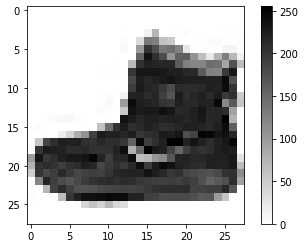

In [10]:
# plt.figure()
plt.imshow(train_images[0], cmap='gray_r')
plt.colorbar()
# plt.grid((False))
plt.show()

In [11]:
# Tensorflow keep the image as matrix and flatten in the networktrain_image
train_images = train_images / 255.0
test_images = test_images / 255.0

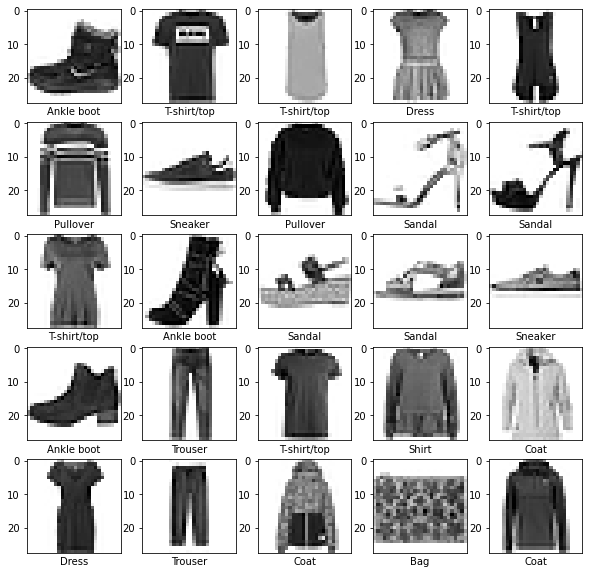

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.xticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  # plt.imshow(train_images[i], cmap='gray_r')
  # plt.cm.binary same as gray_r
  # https://matplotlib.org/3.1.0/_images/sphx_glr_colormaps_003.png
  # https://matplotlib.org/3.5.0/tutorials/colors/colormaps.html
  plt.xlabel(class_names[train_labels[i]])
plt.show()

## **3-Build the machine learning model**

In [13]:
#Tensorflow example didnt import below and use tf.keras. when using keras API
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
model = keras.Sequential([
                          layers.Flatten(input_shape = (28,28)),
                          layers.Dense (128, activation = 'relu'),
                          layers.Dense(10)
])

In [15]:
#try to do prediction without training
predictions = model(train_images[:1]).numpy()
predictions

array([[ 0.54203445, -1.0078237 ,  0.10897128, -0.3744313 ,  0.6226364 ,
        -0.39906523,  0.47819075, -0.64730585,  0.5461799 , -0.13054058]],
      dtype=float32)

In [16]:
#convert above logit to probabilies of each class
tf.nn.softmax(predictions).numpy()

array([[0.15403607, 0.03269848, 0.0998954 , 0.06160364, 0.16696575,
        0.06010465, 0.14450918, 0.04689197, 0.15467595, 0.07861888]],
      dtype=float32)

## **4-Complite Model with optimizer, loss, metrics**

In [17]:
# if softmax is not added to the model
# loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# if softmax is added to the model
## loss='sparse_categorical_crossentropy' 

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## **5-Train the model**

In [18]:
model.fit(train_images, train_labels,
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4977 - accuracy: 0.8250
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3752 - accuracy: 0.8669
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3375 - accuracy: 0.8769
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3128 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2929 - accuracy: 0.8926
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2803 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2679 - accuracy: 0.9004
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2563 - accuracy: 0.9048
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2472 - accuracy: 0.9084
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2

## **6-Evaluate the model with Test set**

In [19]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - loss: 0.3446 - accuracy: 0.8795 - 557ms/epoch - 2ms/step


[0.34463563561439514, 0.8794999718666077]

In [20]:
# test result is approx 88%, which is a bit less than the training accuracy
# This is due to overfitting
# i.e model are not generalized enough

## **7-Prediction**

In [97]:
#add softmax layer to train the logit output to proablility
probability_model = tf.keras.Sequential([
                                         model,
                                         layers.Softmax()
])

In [98]:
predictions = probability_model.predict(test_images)

In [99]:
import random
test_index = random.randint(0,10000)
test_index

2828

In [100]:
predictions[test_index]

array([5.4256523e-01, 1.7601902e-03, 1.8770089e-02, 1.0483080e-02,
       5.4598995e-03, 2.2685322e-06, 4.2056051e-01, 1.7951404e-06,
       3.2068411e-04, 7.6249016e-05], dtype=float32)

In [101]:
prediction = probability_model(test_images[[test_index]])
prediction = prediction.numpy()
prediction

array([[5.4256499e-01, 1.7601936e-03, 1.8770108e-02, 1.0483095e-02,
        5.4599028e-03, 2.2685399e-06, 4.2056072e-01, 1.7951396e-06,
        3.2068425e-04, 7.6249140e-05]], dtype=float32)

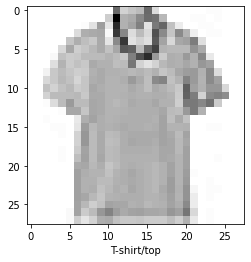

In [102]:
plt.imshow(test_images[test_index],cmap=plt.cm.binary)
plt.xlabel(class_names[test_labels[test_index]])

plt.show()

In [103]:
predicted_label = prediction[0].argmax()
# if prediction is tensor and did not convert to numpy, use below function
# np.argmax(prediction[0])

percent = "{:2.0f}%".format(100*np.max(prediction[0]))
print('Answer:', class_names[test_labels[test_index]] )
print('Predicted: ', class_names[predicted_label], percent)

Answer: T-shirt/top
Predicted:  T-shirt/top 54%


## **8-Verify Prediction**

In [42]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  # blue for correct label, red for wrong label
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  # thisplot = plt.bar(class_names, predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  # blue for correct label, red for wrong label
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

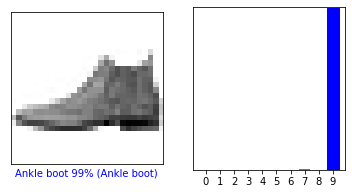

In [43]:
i = 0
plt.figure(figsize=(6,3))
# plt.figure(figsize=(25,3))
#plot image
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
#plot percentage and graph
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

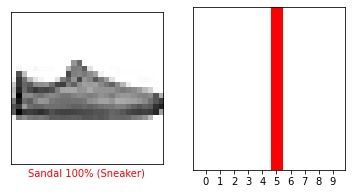

In [44]:
i = 12
plt.figure(figsize=(6,3))
# plt.figure(figsize=(25,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

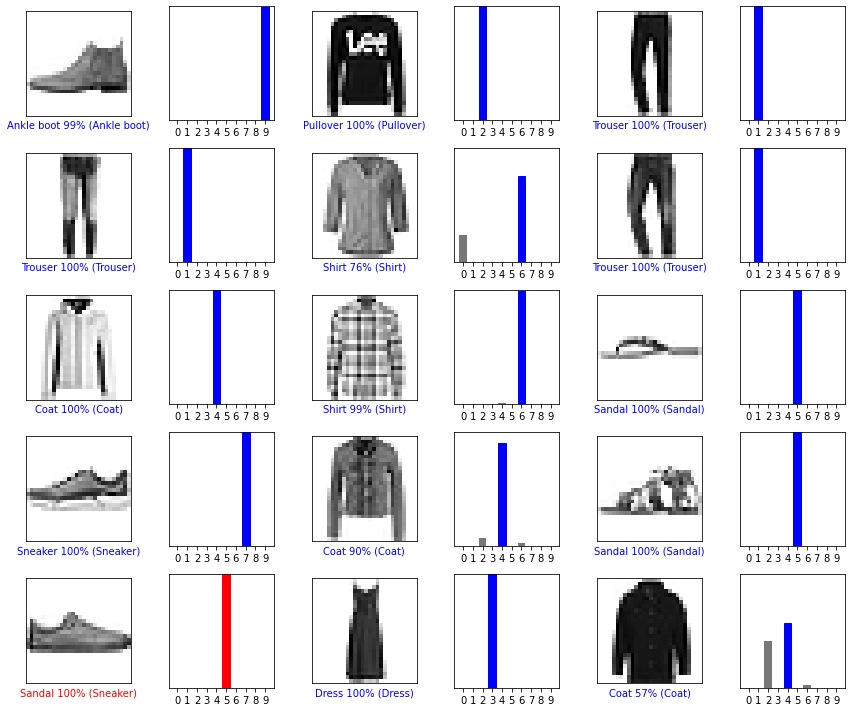

In [45]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()